# Vision Models

Vision models can look at pictures and then tell you what's in them using words. These are called vision-to-text models. They bring together the power of understanding images and language. Using fancy neural networks, these models can look at pictures and describe them in a way that makes sense. They're like a bridge between what you see and what you can read. 

This is super useful for things like making captions for images, helping people who can't see well understand what's in a picture, and organizing information. As these models get even smarter, they're going to make computers even better at understanding and talking about what they "see" in pictures. It's like teaching computers to understand and describe the visual world around us.

<img src="./images/prompt_req_resp.png" height="35%" width="%65">

**Note**: 
To run any of these relevant notebooks you will need an account on Anyscale Endpoints and
OpenAI. Use the template enivironment files to create respective `.env` file for either 
Anyscale Endpoints or OpenAI.

In [109]:
import warnings
import os

import openai
from openai import OpenAI

from dotenv import load_dotenv, find_dotenv
from typing import List

Load the environment

In [110]:
_ = load_dotenv(find_dotenv()) # read local .env file
warnings.filterwarnings('ignore')
openai.api_base = os.getenv("ANYSCALE_API_BASE", os.getenv("OPENAI_API_BASE"))
openai.api_key = os.getenv("ANYSCALE_API_KEY", os.getenv("OPENAI_API_KEY"))
MODEL = os.getenv("MODEL")
print(f"Using MODEL={MODEL}; base={openai.api_base}")

Using MODEL=gpt-4-1106-preview; base=https://api.openai.com/v1


#### Change the model to use gpt-4-vision-preview!

In [111]:
MODEL = "gpt-4-vision-preview"

In [112]:
# create the OpenAI client, which can be used transparently with Anyscale Endpoints too

from openai import OpenAI

client = OpenAI(
    api_key = openai.api_key,
    base_url = openai.api_base
)

In [113]:
# Utility function to send and fetch response

def get_commpletion(clnt: object, model: str, messages: List[object]) -> str:
    chat_completion = clnt.chat.completions.create(
        model=model,
        messages= messages,
        max_tokens=1000,
        temperature = 0.8)

    response = chat_completion.choices[0].message.content
    return response

In [114]:
# Got the code off openai forums
from io import BytesIO
from PIL import Image

def encode_image(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        max_dim = max(width, height)
        if max_dim > 1024:
            scale_factor = 1024 / max_dim
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)
            img = img.resize((new_width, new_height))
        
        buffered = BytesIO()
        img.save(buffered, format="JPEG")
        img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
        return img_str

In [118]:
def display_image(img_path):
    
    from IPython.display import Image, display

    # Display the image in the notebook cell
    display(Image(filename=img_path))

In [115]:
image_paths = ["./images/pexels-photo-14690500.jpeg",
               "./images/pexels-photo-313782.jpeg"]


In [116]:
system_content = """You are an expert analyzing images and provide accurate descriptions.
You do not make descriptions."""

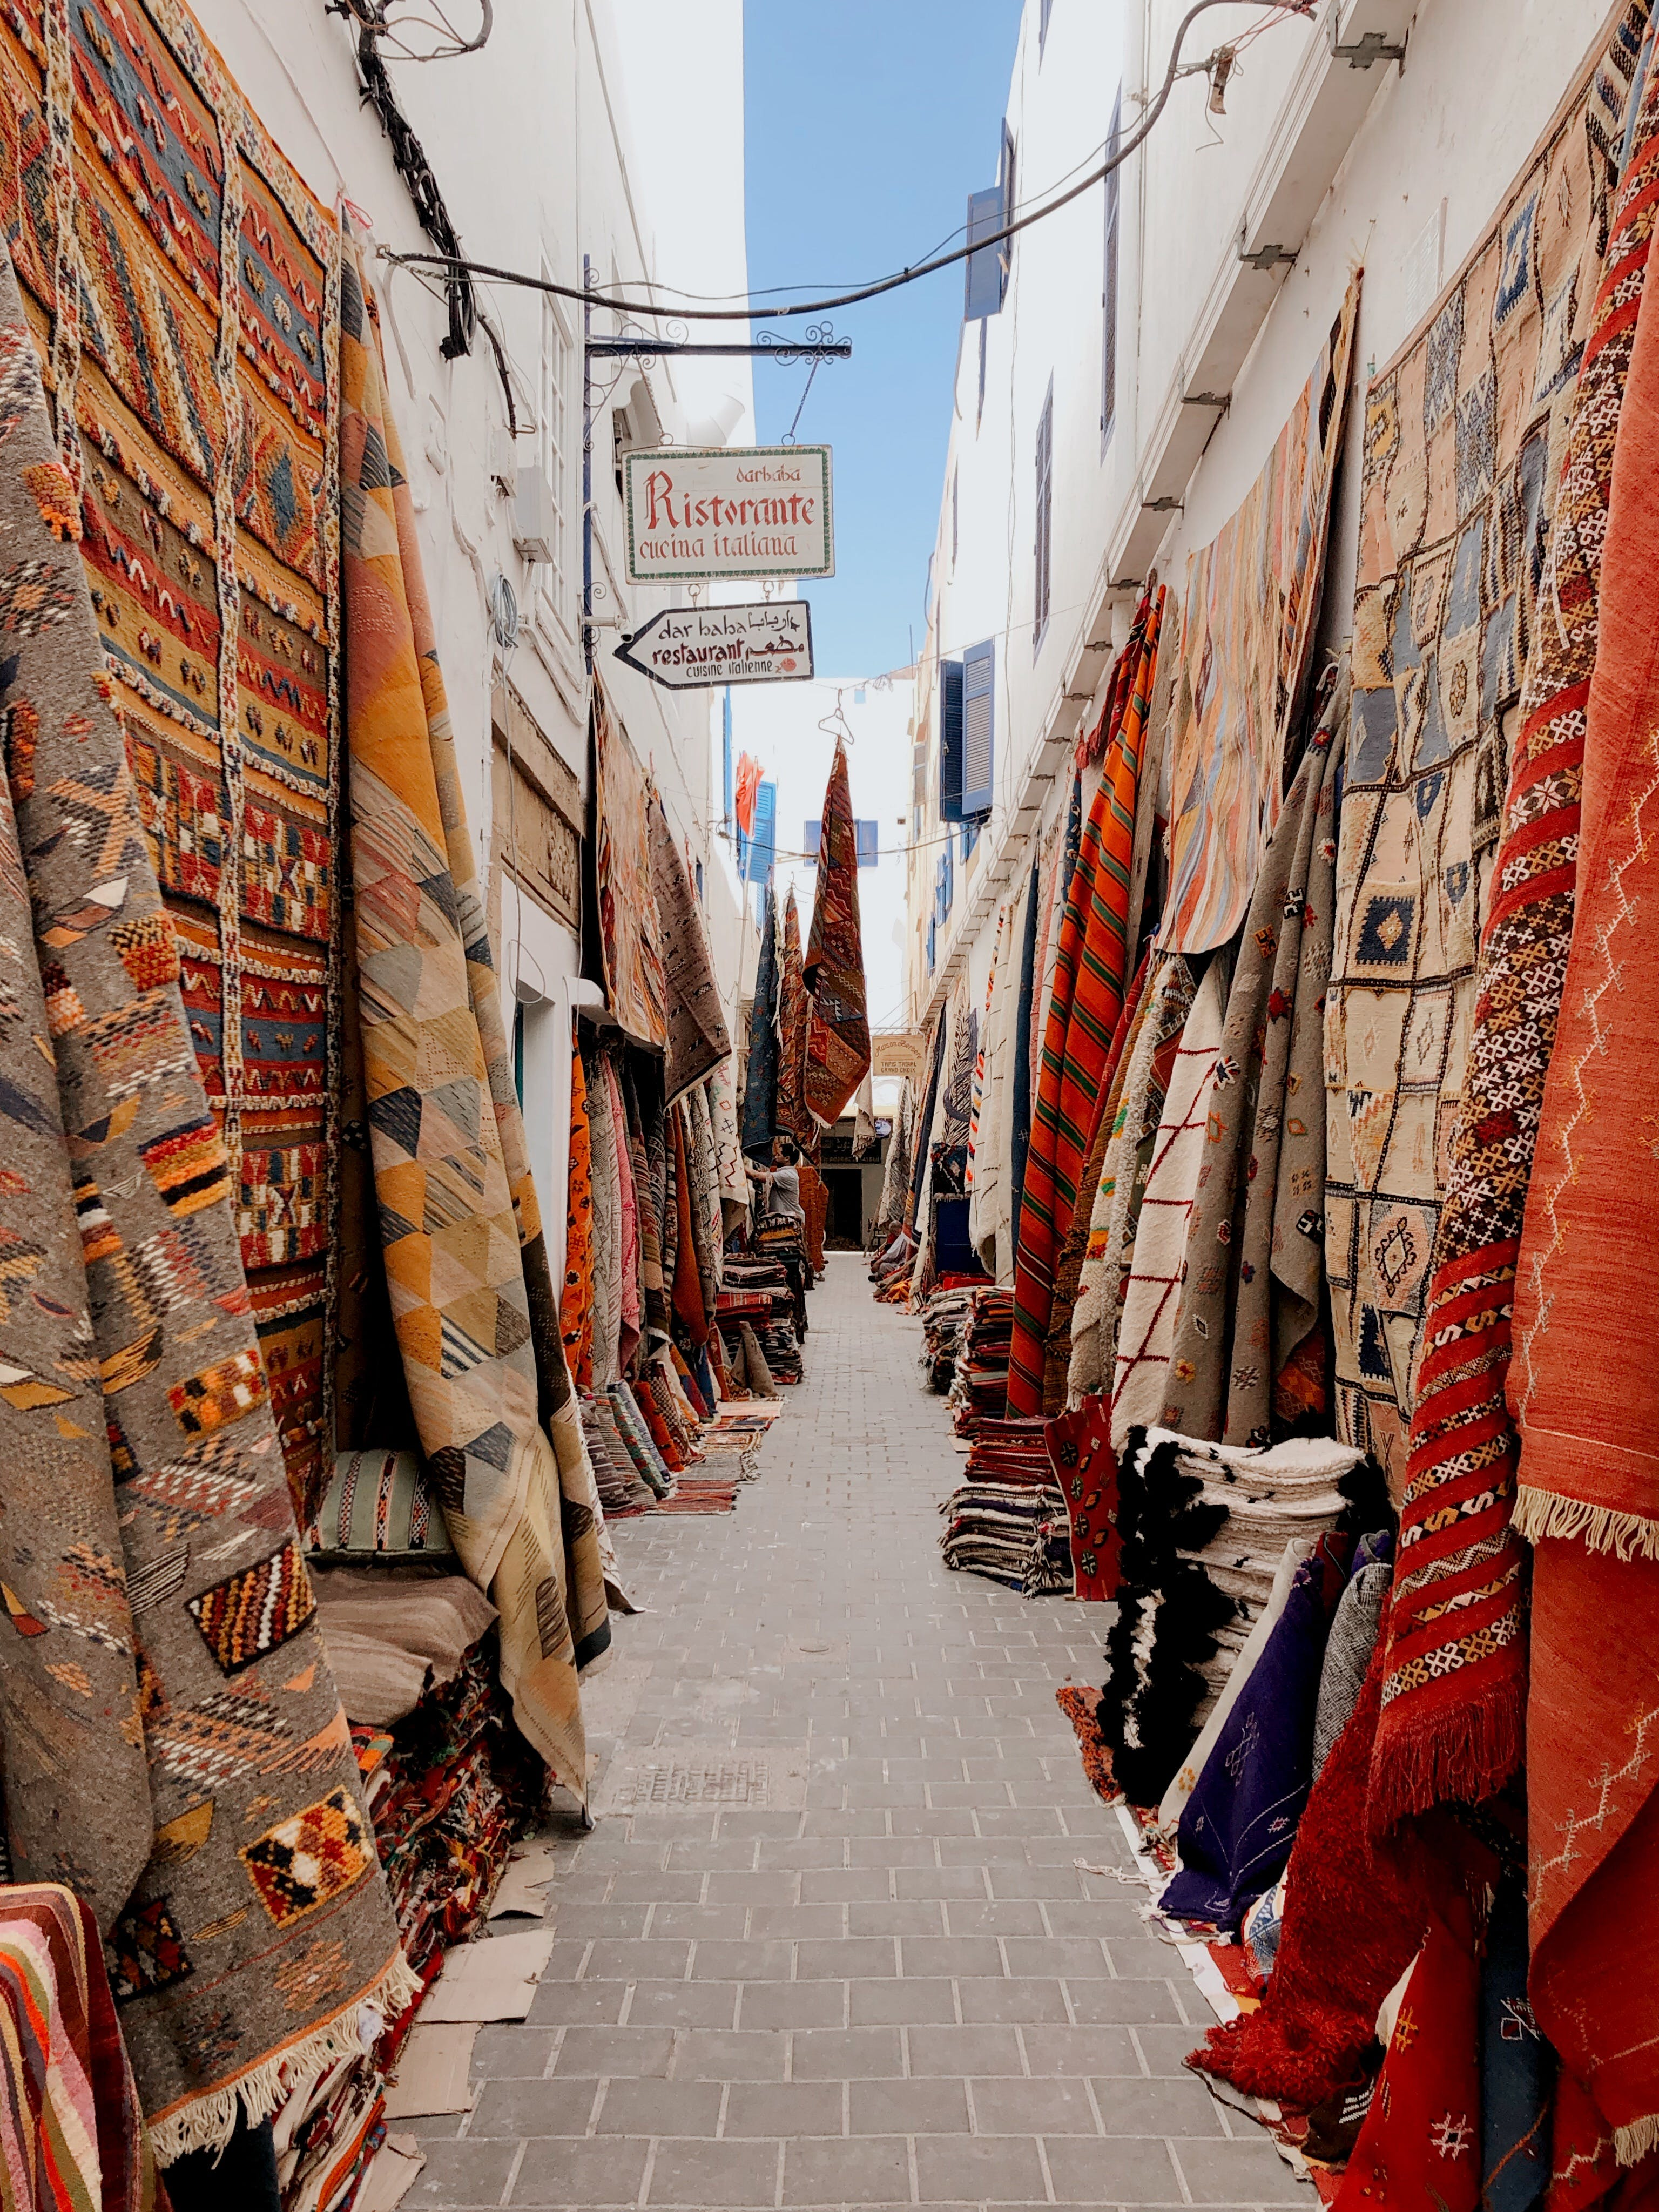

Image description: The picture captures a narrow alleyway in what appears to be a market setting, likely within a country that has cultural ties to textile crafts and possibly a Mediterranean or Middle Eastern influence based on the style of the goods and signage. The alley is lined with a variety of colorful rugs and textiles, displayed hanging on the walls on either side. The textiles feature intricate patterns and designs, suggesting a traditional art style that may be indicative of the region's heritage and craftsmanship.

The buildings are white with a simple architectural style, possibly plastered, which is characteristic of many Mediterranean and North African countries to reflect sunlight and keep the interiors cool. The sky is bright and clear, suggesting a sunny and warm climate. The ground is paved with rectangular grey tiles, and the alley seems clean and well-maintained.

There are signs hung above in the alley. One sign reads "Ristorante cucina tipica," which is Italian f

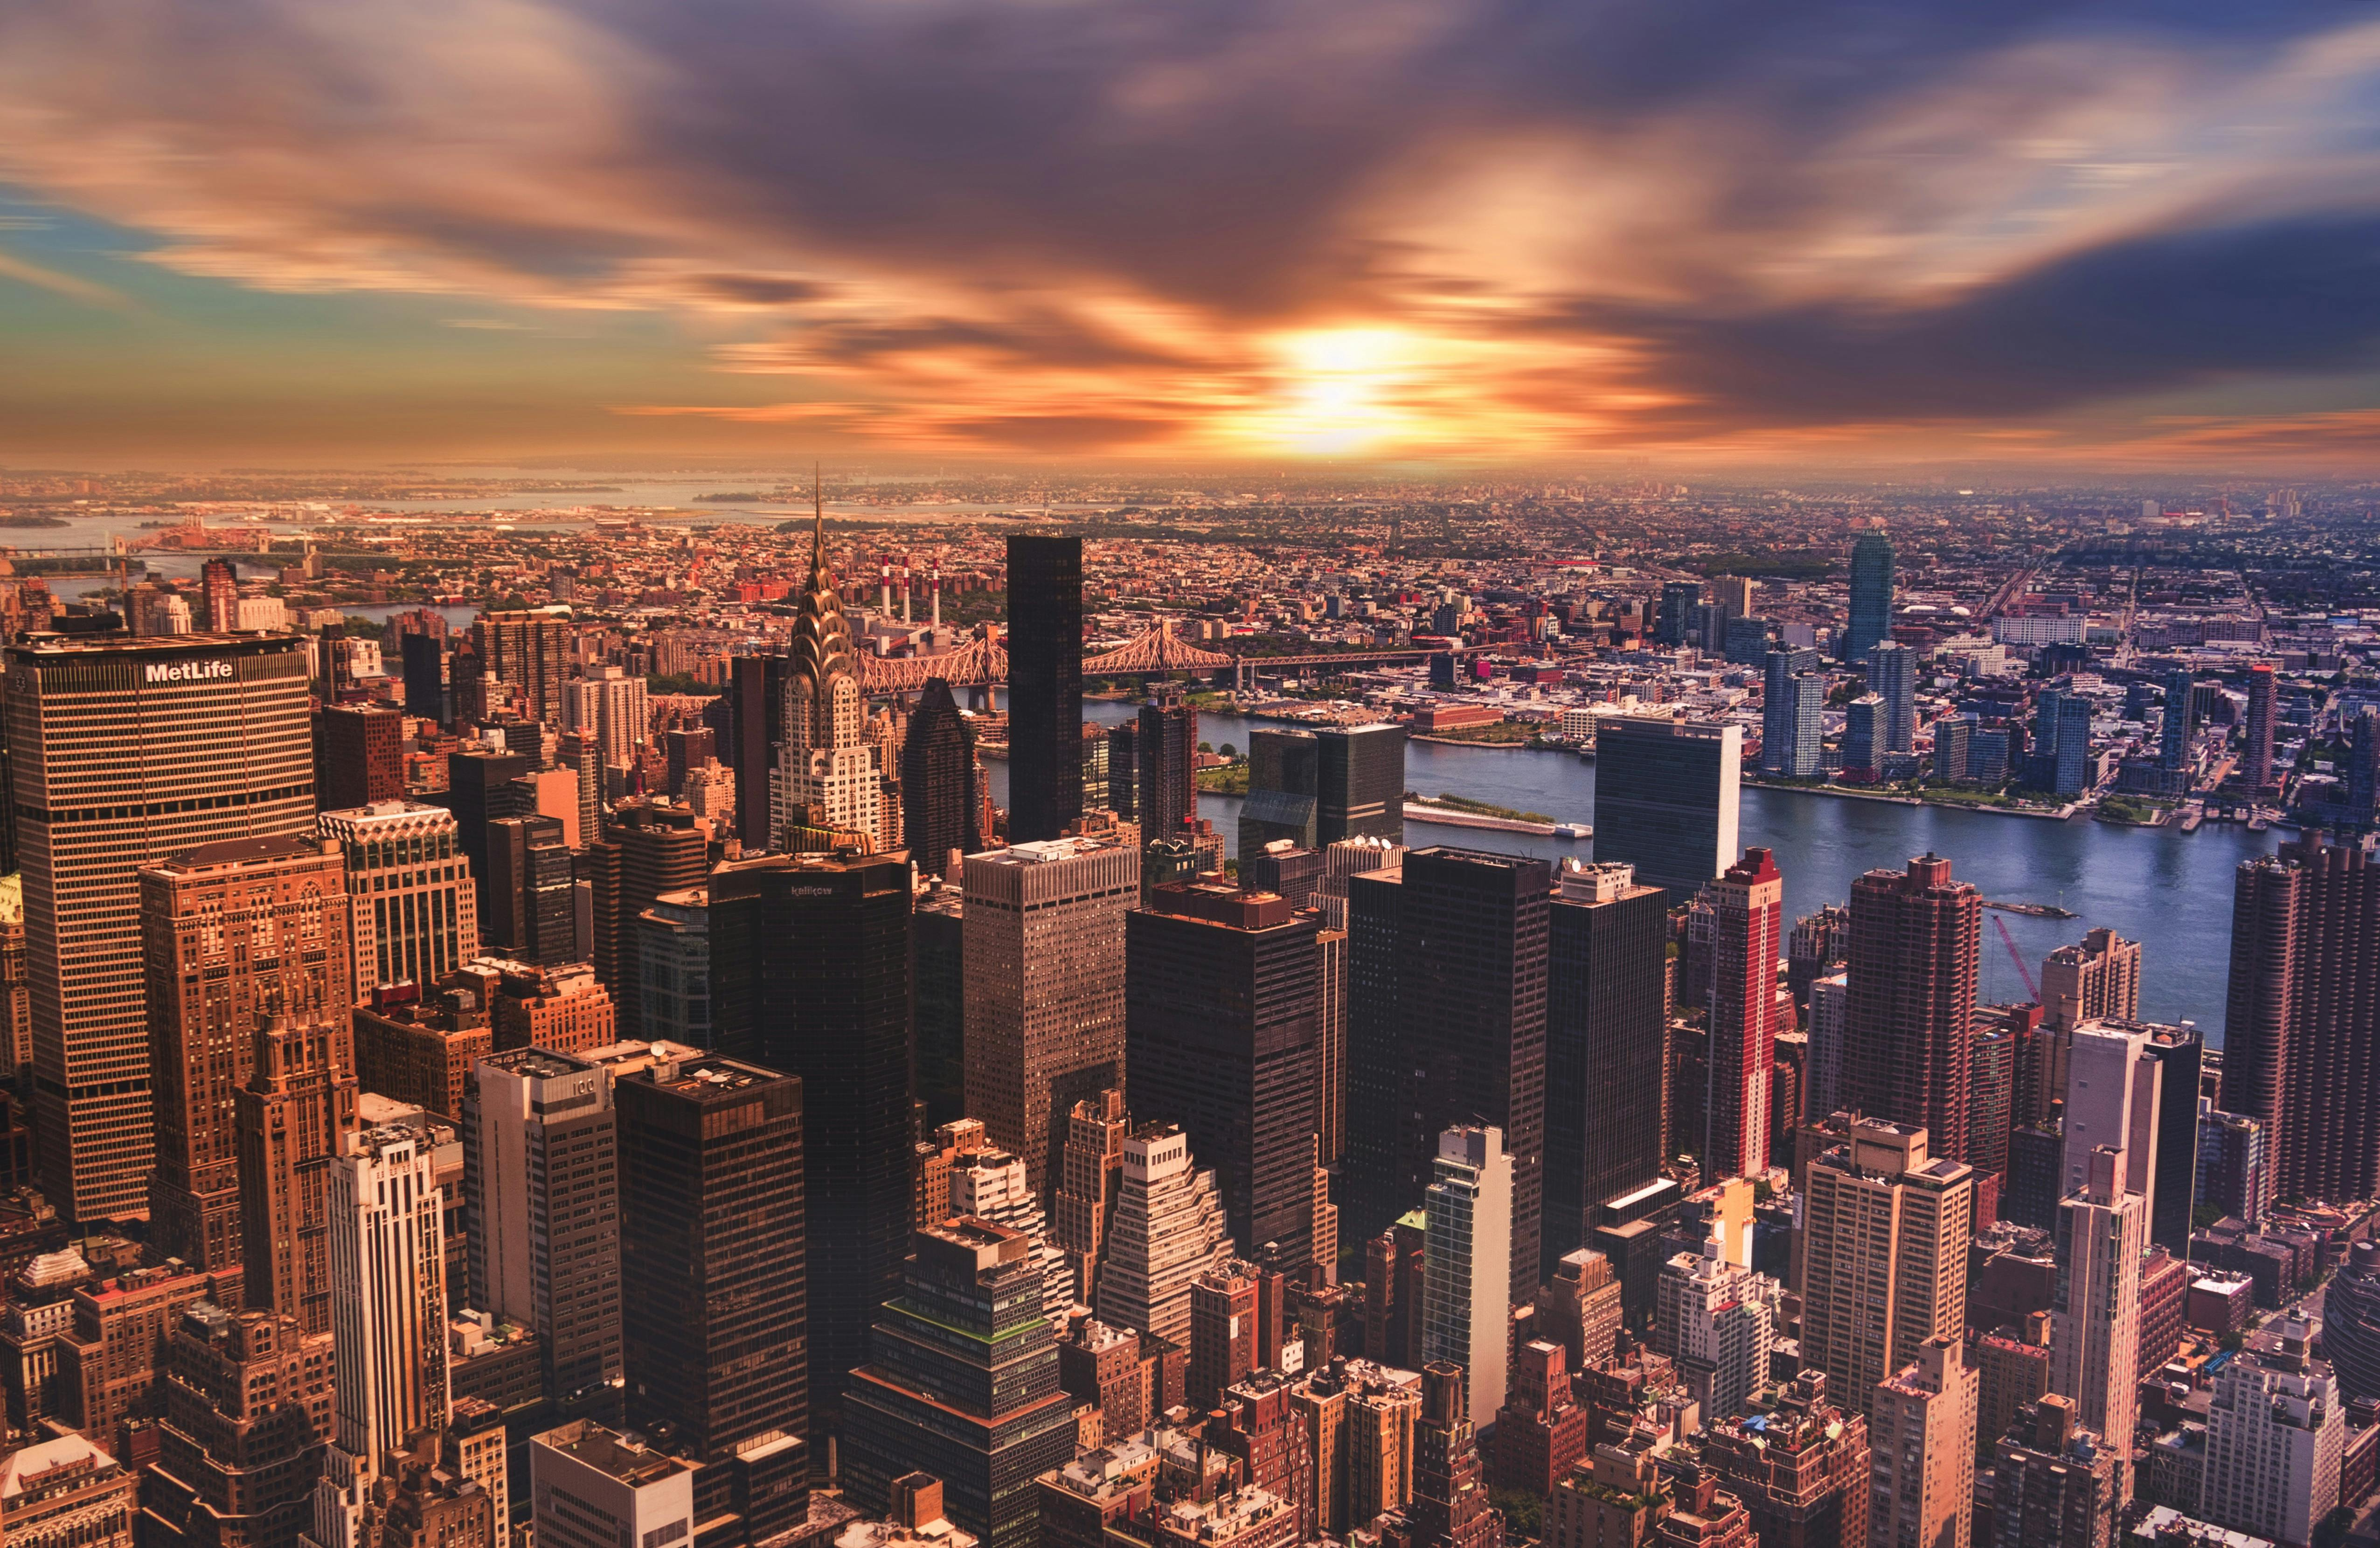

Image description: This is an aerial or high-altitude image of a dense urban skyline during what appears to be either sunrise or sunset, given the warm golden and orange hues in the sky and the long shadows cast by the buildings. The skyline is characterized by numerous skyscrapers of varying heights, tightly packed together, creating a sense of a bustling metropolis. In the foreground, one of the buildings prominently displays the "MetLife" logo, suggesting the presence of corporate offices.

The body of water to the right of the image, along with the configuration of the buildings, suggests that this could be a view of Manhattan in New York City, USA. The river is likely the East River, and the landmass across the river could be the borough of Queens or Brooklyn. The lighting and the color saturation give the photograph a dramatic and perhaps slightly stylized appearance, enhancing the contrast and depth of the cityscape.

There are no overt indications of an art style applied to the

In [119]:
for image_path in image_paths: 
    encoded_string = encode_image(image_path)
    messages=[
        {
            "role": "system",
            "content": [
                {"type": "text", "text": system_content},
            ],
        },
        {
            "role": "user",
            "content": [
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{encoded_string}"},
                    }
                ],
        },
        {
                "role": "user",
                "content": [
                    {"type": "text", 
                     "text": """Describe this picture, landscape, buildings, country, settings, and art style if any dictated. 
                     Identify any signs and indicate what they may suggest."""},
                ],
        },
        ]
    response = get_commpletion(client, MODEL, messages)
    display_image(image_path)
    print(f"Image description: {response}\n")

## Modality Model is your eyes & ears! 😜  Feel the wizardy prompt power 🧙‍♀️